# Pneumonia Detection using CNN (Convolutional Neural Network)

By Kyung Myung Lee (Capston Project)

## Environment Setting

In [8]:
# Libraries
import os
import numpy as np 
from numpy import asarray
import pandas as pd
import seaborn as sns

#IMPORTANT INFO.
#imageio.imread: return type numpy array
#matplotlib image return numpy.array
#cv2 imread() returns a 2D or 3D matrix based on the number of color channels present in the image
#Pillow Image return image Object

from PIL import Image, ImageOps, ImageFilter #return image Object
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.linear_model import LogisticRegression


## Use case

Background and goal:
As many published studies have informed, many death cases of COVID-19 have shown that serious lung complications of pneumonia were direct causes to the death. So, we can say that pneumonia is one of serious human diseases that can cause such fatal events to humans. When it comes to very young children of one to five years old who contracted the illness, the situation can get worse because it is surely agreeable that they are too young to explain their physical conditions and symptoms about their sickness before not too serious or too late. For this reason, detecting pneumonia of very young kids as soon as possible will be very helpful to save their lives and can finally decrease mortality rates of the group. The circumstances inspire this capstone project to help save their lives by building models that are able to detect a x-ray image of a patient with pneumonia quickly and immediately as a pre-diagnosis tool before doctors’ confirmed diagnoses.

Stakeholders:
They would be business or management people who are related to medical industry as well as medical practitioner and doctors.

Framework and algorithm:
CNN is chosen to train a model on image data. Platform is Python, Keras(Tensorflow high level API). The code was run on a local laptop and cloud platform (IBM Watson studio or AWS) environment.

In short, the problem to solve in this case is to detect a x-ray image of a patient in the age range from one to five with a pneumonia using a binary classifier built by convolutional neural network (CNN).

## Data Description

Dataset:
Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data,v2 http://dx.doi.org/10.17632/rscbjbr9sj.2 (License: CC BY 4.0)

Access site:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia or
https://data.mendeley.com/datasets/rscbjbr9sj/2

Data source in this case comes from retrospective cohorts of paediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. It includes chest x-ray images , which were selected from retrospective cohorts of the patients.

The dataset is organized into 3 folders (train, test, val). Each folder contains two subfolders for two image categories (Pneumonia/Normal). There are 5,840 X-ray images (JPEG) in total and 2 categories (Pneumonia/Normal).

## Explore and assess data quality

Original images are of JPEG format. Errors or mistakes especially by humans, such as missing values are unlikely to be because jpeg is a machine-created format. As you can see the following visualization of sample images, their image quality is good enough clearly to identify the specific part of human body and images characteristics between normal and pneumonia can be differentiated easily in sight. The opacity of image of pneumonia is because of the disease. It is not related to any image quality. One characteristics of the x-ray image data different from other types of data is the huge data volume. It makes image analysis in machine learning a big challenge.
One quality of concern we found is that training dataset is imbalnaced training dataset between two classes (normal and pneumonia). But, it can be overcome with a data augmentation technique. More details follow below.
To assess data quality, basic statistics(mean, max, min, count, etc.) and image vialization are used.

This part includes visualizing and comparing images with different conditions, showing statistics about them, and plotting the distribution of width and height sizes with density curve with histogram. This exploration helps get insights about the task design of data preprocess including ETL and algorithm selection for data model.

- Visualize normal and pneumonia X-ray images

The illustrated image examples shows a clearer lung without any areas of abnormal opacification for a normal patient and an more opaque lung with areas of opacity for a patient with bacterial pneumonia than the other. The obvious information within the images, which make it possible to differentiate between normal and pneumonia in sight, seem to be well-learned by a model in machine learning if we select a adequate model algorithm. Convolutional neural network (CNN) algorithm is well-known as good at learning high dimensional data such as image data. So, CNN is selected for this project.

JPEG (1422, 1152) L
JPEG (1264, 1072) L


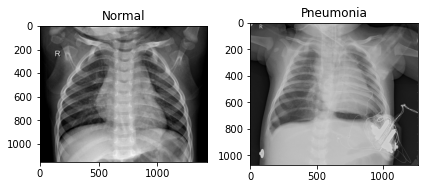

In [9]:
# Display an image 
img_normal = Image.open('./data/chest_xray/train/NORMAL/IM-0117-0001.jpeg')
print(img_normal.format, img_normal.size, img_normal.mode) #L:single channel (greyscale)

img_penumonia = Image.open('./data/chest_xray/train/PNEUMONIA/person23_bacteria_80.jpeg')
print(img_penumonia.format, img_penumonia.size, img_penumonia.mode) #L:single channel (greyscale)

plt.subplot(1,2,1)
plt.imshow(img_normal, cmap=plt.get_cmap('gray'))
plt.title("Normal")

plt.subplot(1,2,2)
plt.imshow(img_penumonia, cmap=plt.get_cmap('gray'))
plt.title("Pneumonia")

plt.tight_layout()

- Compare images with different sizes and shape (square or rectangular)

Decently scaling the original images to the smaller size (32x32) in width and height than the original one will make them lose some information of them, but as the smaller images (in the middle for normal and pneumonia below) have shown, they still have enough information in them as much as we can differentiate from each other (That is, whether it is normal or pneumonia.) However, as illustrated in the last images below (15x15), resizing images too much will cause to lose too much information. It makes them less useful for model-training.

Another aspect of original image is that not all images are not sqaured. In other words, most images are different width and height size each other. But whether the original image is square or rectangular doesn't affect classification quality as we see the images below. square shape of image still has enough information to use to solve this classification problem.

When it comes to image analysis, reduction of image information including dimension, but still having good enough information for model-training are very important, especially when machine learning uses very heavy computing power expectably. The repeated heuristic learning through data exploration has informed that 32 x 32 size of image would be a good selection we make.

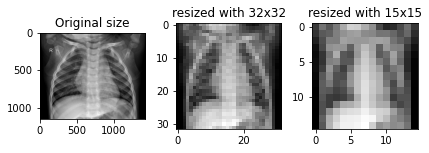

In [10]:
#Normal image with different size (no. of pixel)

plt.subplot(1,3,1)
plt.imshow(img_normal, cmap=plt.get_cmap('gray'))
plt.title("Original size")

plt.subplot(1,3,2)
plt.imshow(img_normal.resize((32,32)), cmap=plt.get_cmap('gray'))
plt.title("resized with 32x32")

plt.subplot(1,3,3)
plt.imshow(img_normal.resize((15,15)), cmap=plt.get_cmap('gray'))
plt.title("resized with 15x15")
plt.tight_layout()

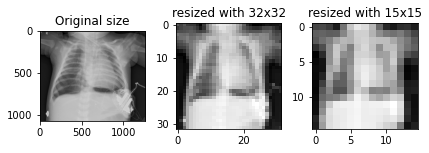

In [11]:
#Pneumonia image with different size (no. of pixel)

plt.subplot(1,3,1)
plt.imshow(img_penumonia, cmap=plt.get_cmap('gray'))
plt.title("Original size")

plt.subplot(1,3,2)
plt.imshow(img_penumonia.resize((32,32)), cmap=plt.get_cmap('gray'))
plt.title("resized with 32x32")

plt.subplot(1,3,3)
plt.imshow(img_penumonia.resize((15,15)), cmap=plt.get_cmap('gray'))
plt.title("resized with 15x15")
plt.tight_layout()

- Compare RGB version and only gray version  of the same image

As we can see the images below, with regard to the pneumonia detection, we do not necessarily need to use the image with RGB.
Gray one would be enough for use related to our interest. We can clearly investigate it with the gray image.

JPEG (2428, 2540) L


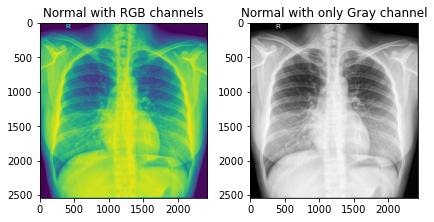

In [12]:
# normal image
img_normal = Image.open('./data/chest_xray/train/NORMAL/NORMAL2-IM-0587-0001-0002.jpeg')
print(img_normal.format, img_normal.size, img_normal.mode) #RGB channels

plt.subplot(1,2,1)
plt.imshow(img_normal)
plt.title("Normal with RGB channels")

plt.subplot(1,2,2)
plt.imshow(img_normal, cmap=plt.get_cmap('gray'))
plt.title("Normal with only Gray channel")

plt.tight_layout()

JPEG (1010, 676) RGB


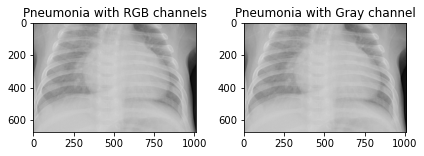

In [13]:
# pneumonia image
img_penumonia = Image.open('./data/chest_xray/train/PNEUMONIA/person530_bacteria_2233.jpeg')
print(img_penumonia.format, img_penumonia.size, img_penumonia.mode) # RGB channels

plt.subplot(1,2,1)
plt.imshow(img_penumonia)
plt.title("Pneumonia with RGB channels")

plt.subplot(1,2,2)
plt.imshow(img_penumonia, cmap=plt.get_cmap('gray'))
plt.title("Pneumonia with Gray channel")

plt.tight_layout()

- Shows statistics of train dataset (appended raw image data for training) 

(* To get the statistics as follows, funciton get_transform_images_array needs to be runned first because the appended operation of collected raw images is performed as a part of the function )

Training dataset: As the statistic below step has shown, the dataset is serious imbalanced between the number of images belonging to each class (1,341 normal and 3,875 pneumonia images).

Test dataset: It comprises 188 normal and 312 pneumonia images. Originally, 16 images are provided for validation, but it seems to be too small amounts to use and is not a mandate for use. Instead, some of images in training dataset is used as validation data while training CNN.

The images are all different from each other in their size. The Kernel density plots depict distributions of width and height pixels of images repectively. The distribution of pixel size of width or height are a little right-skewed overall. The average image size for normal is around 1,667 x 1,381 (width x height) based on the statistic.

In [53]:
print("Train Normal dataset:\r\n", train_normal_info.describe(), "\r\n\r\nTrain Pneumonia dataset:\r\n", train_pneumonia_info.describe())

Train Normal dataset:
              width       height
count  1341.000000  1341.000000
mean   1667.734526  1381.431022
std     289.210512   326.320734
min     912.000000   672.000000
25%    1466.000000  1152.000000
50%    1640.000000  1328.000000
75%    1824.000000  1542.000000
max    2916.000000  2663.000000 

Train Pneumonia dataset:
              width       height
count  3875.000000  3875.000000
mean   1200.483613   825.026839
std     291.305676   277.073758
min     384.000000   127.000000
25%    1000.000000   640.000000
50%    1168.000000   776.000000
75%    1368.000000   968.000000
max    2772.000000  2304.000000


In [54]:

print("Test Normal dataset:\r\n", test_normal_info.describe(), "\r\n\r\nTest Pneumonia dataset:\r\n", test_pneumonia_info.describe())

Test Normal dataset:
              width       height
count   234.000000   234.000000
mean   1800.303419  1369.089744
std     365.930476   429.178790
min     984.000000   496.000000
25%    1533.000000  1040.000000
50%    1762.000000  1317.500000
75%    2030.250000  1638.750000
max    2752.000000  2713.000000 

Test Pneumonia dataset:
              width       height
count   390.000000   390.000000
mean   1140.823077   765.289744
std     208.858427   193.097470
min     728.000000   344.000000
25%     992.000000   632.000000
50%    1111.000000   736.000000
75%    1256.000000   871.750000
max    2000.000000  1456.000000


In [55]:
#concatenate normal and pneumonia data
df =pd.concat([train_normal_info, train_pneumonia_info], axis=0)
df.shape

(5216, 2)

In [56]:
df.describe() # minimum pixels is 127 (minimum height value).

,width,height
count,5216.000000,5216.000000
mean,1320.610813,968.074770
std,355.298743,378.855691
min,384.000000,127.000000
25%,1056.000000,688.000000
50%,1284.000000,888.000000
75%,1552.000000,1187.750000
max,2916.000000,2663.000000


- Visualizes density of height and weight size of images of train dataset

The distribution of pixels of width or height is a little right-skewed.

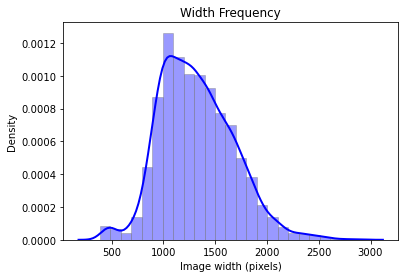

In [57]:
# Kernel Density Curve graph with histogram of image width

ax = sns.distplot(df['width'], hist=True, kde=True, bins=25, color='blue', 
                               hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})

ax.set_title('Width Frequency')
ax.set_xlabel('Image width (pixels)')
ax.set_ylabel('Density')
plt.show()

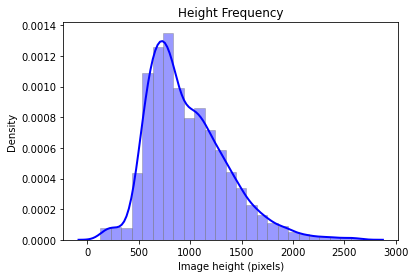

In [58]:
# Kernel Density Curve graph with histogram of image height

ax = sns.distplot(df['height'], hist=True, kde=True, bins=25, color='blue', 
                               hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})

ax.set_title('Height Frequency')
ax.set_xlabel('Image height (pixels)')
ax.set_ylabel('Density')
plt.show()

## Data Preprocessing (Extract, Transform, Load (ETL) Process)

This is one of the most important steps of data analysis because ways of data manipulation will affect both algorithm and model very much. It is expected that well-prepared data will improve modelling quality in many aspects including the increase of computational and model performance.

### Overall steps
We collect and append image data, convert, and transform them.

"get_transform_images_array" is a major rountine to do data pre-processing. Four data manipulation techniques are performed  whithin this function. They are image augmentation, resizing to 32 by 32, Conversion to gray channel, and normalization. The following are the techniques we use for data manipulation. The following explains what aspect has brought us to the selection of each technique and why we have chosen it for each data pre-processing step.

0. load raw data
1. Conversion to gray channel only
2. Image resizing to 32 by 32
3. Normalization and standardization
4. Generate images for augmentation and then, finally add them to the data

### Explain details of each step

- Convert to gray channel only

As we can see the images below, we don't differentiate between RGB channels and gray one, regardless of normal or pneumonia images.

Again, when it comes to image analysis, reduction of image information including dimension, but still having good enrough information for model-training are very important, especially when machine learning uses very heavy computing power expectably. So, this visual evidence justfies our selection of image with gray channel only because it allows us to hold a smallest amount of information in pixel level.

image.convert(mode='L') of Pillow library module do this conversion for us.

- Image resizing to 32 by 32

As we have explored data above (Please refer to the visuzliation in data exploration for detail insights), decently scaling original images to the smaller size (32 by 32) in width and height than the original one will make them lose some information for them, but they still have enough information in them as much as we can differentiate each class, whether it is normal or pneumonia. However, we find that resizing images too much (It is illustrated with an image example with 15 by 15) will cause to lose too much information. It makes them less useful for model-training.

Another aspect of original image is that not all images are not sqaured. In other words, most images are different width and height size each other, but whether the original image is square or rectangular doesn't affect classification quality as the images have proved in data exploration step. square shape of image still has enough information to use to solve this classification problem. We don't have an necessity to consider the proportion ratio between width and height of image.
When it comes to image analysis, reduction of image information including dimension, but still having good enrough information for model-training are very important, especially when machine learning uses very heavy computing power expectably. The repeated heuristic learning through data exploration has informed that 32 x 32 size of image would be a good selection we make.
We use resize() of Pillow library module to do that.

- Normalization and standardization

Pixel normalization of pixel values is essential. It is scale pixel values to the range 0 to 1. Pixel standardization is to rescale pixel values into the Gaussian distribution. One of them or both are highly preferred to be done when data is image before feeding them into machine learning algorithm, especially deep learning algorithm such as CNN we use in this case.

There are two main reasons of normalization or standardization. One is because we can compare values in the common range without any bias caused by the different scales by transforming data with different ranges to the same scale. The other is because we can get a benefit of computing process improvement from normalization or standardization by rescaling data ranges, especially in the distributed computing environment.

In this case, both methods are applied. Normalization is applied in data preprocessing step within the function, get_transform_images_array. The range of pixel value is from 0 to 255. So, normalization is done by dividing each pixel value by 255.

- Generate augment data for imalnaced dataset

As the statistic has shown above in the data exploration, the dataset is serious imbalanced between the number of images belonging to each class (1,341 normal and 3,875 pneumonia images). When it comes to convolutional neural networks (CNN) algorithm, the severely under-sampled class for normal compared to the other one will affect the binary classification accuracy poorly. Ideally, equal sample size between two classes would provide CNN algorithm an equal learning opportunity between two classes. As a result, the model built by the algorithm is less likely to fall into misclassification with new data. Therefore, the balanced sample sizes between two classes are very important as well as enough amounts of data samples. Therefore, to make an oversampling effect for the class, normal, data augmentation technique is applied to the normal images of the training set. You can check the augmentation part of the data preprocessing step.

This is done only for normal image data in the training dataset. The function, image_augmentation_using_PIL() below creates new variant images using image rotation, noise, sharpening, and blurring functions that Pillow modules provide. As a result, we have the same number of normal class as that of pneumonia class (3875).

In [14]:
RESIZE_IMG = 32 # image size we use for image resizing
train_augment_list= [] # global varible: List to store variant images created for augmentation

In [15]:
def image_augmentation_using_PIL(im): # im is a resized image(IMG_SIZE*IMG_SIZE)
        print('image_augmentation_using_PIL')
        
        #apply rotation
        rotated_1 = im.rotate(5)
        rotated_1 = rotated_1.resize((RESIZE_IMG,RESIZE_IMG))
        np_rotated_1 = asarray(rotated_1)

        rotated_2 = im.rotate(-5)
        rotated_2 = rotated_2.resize((RESIZE_IMG,RESIZE_IMG))
        np_rotated_2 = asarray(rotated_2)
        
        #apply sharpen or blur
        sharp = im.filter(ImageFilter.SHARPEN)
        sharp = sharp.resize((RESIZE_IMG,RESIZE_IMG))
        np_sharp = asarray(sharp)

        blur = im.filter(ImageFilter.GaussianBlur)
        blur = blur.resize((RESIZE_IMG,RESIZE_IMG))
        np_blur = asarray(blur)
       
        #apply border
        boarder = ImageOps.expand(im, border=5)
        boarder = boarder.resize((RESIZE_IMG,RESIZE_IMG))
        np_boarder = asarray(boarder)
 
        np_rotated_1 = np_rotated_1.astype('float32')/255  #rescaling (normalization)
        np_rotated_2 = np_rotated_2.astype('float32')/255
        np_sharp = np_sharp.astype('float32')/255
        np_blur = np_blur.astype('float32')/255
        np_boarder = np_boarder.astype('float32')/255
        
        # normalize to the range 0-1
        # confirm the normalization

        train_augment_list.append(np_rotated_1)
        train_augment_list.append(np_rotated_2)
        train_augment_list.append(np_sharp)
        train_augment_list.append(np_blur)
        train_augment_list.append(np_boarder)

In [16]:
# Function of ETL process

def get_transform_images_array(dir_path):
  loaded_images=[]
  sz_images=[]
  for img_file in os.listdir(dir_path):
        if img_file == '.ipynb_checkpoints':
            continue
        else:
            #1. load the image
            image = Image.open(dir_path+img_file) #return PIL image Object
            print(img_file, image.format, image.size, image.mode) #mode: color channel         
            #2. get image width and height info.
            sz_images.append(image.size[:2])  #append width and height of each image, (width,height)=(size[0],size[1])
            
            #3. convert the image to grayscale
            gray_image = image.convert(mode='L')
            print(gray_image.size)
            
            #4. resize image and ignore original aspect ratio
            img_resized_data = gray_image.resize((RESIZE_IMG,RESIZE_IMG))

            #5. convert image to numpy array
            numpy_image = asarray(img_resized_data)
            # confirm pixel range is 0-255
            #print('Data Type: %s' % numpy_image.dtype)
            #print('Min: %.3f, Max: %.3f' % (numpy_image.min(), numpy_image.max()))
            
            #6. normalize to the range 0-1
            numpy_image = numpy_image.astype('float32')/255    
            # confirm the normalization
            print('Min: %.3f, Max: %.3f' % (numpy_image.min(), numpy_image.max()))
            print(numpy_image.shape)
            loaded_images.append(numpy_image)
            
            #7. prepare augmented normal image data for use afterwards.          
            if dir_path == './data/chest_xray/train/NORMAL/' and len(train_augment_list) < 2534: #we need 2,534 (3875-1341=2534) new images additionally for normal(1341) to be balanced with the amount of pneumonia images(3875)
                image_augmentation_using_PIL(img_resized_data) #prepare augmented normal image data in advance due to imbalanced counts of target classes

  return np.array(loaded_images), pd.DataFrame(sz_images, columns = ['width', 'height'])

In [17]:
# train_normal_info: all appended raw image data
# train_normal: data after data preprocessing

train_normal, train_normal_info = get_transform_images_array('./data/chest_xray/train/NORMAL/')
train_pneumonia, train_pneumonia_info = get_transform_images_array('./data/chest_xray/train/PNEUMONIA/')

IM-0115-0001.jpeg JPEG (2090, 1858) L
(2090, 1858)
Min: 0.004, Max: 0.922
(32, 32)
image_augmentation_using_PIL
IM-0117-0001.jpeg JPEG (1422, 1152) L
(1422, 1152)
Min: 0.000, Max: 0.902
(32, 32)
image_augmentation_using_PIL
IM-0119-0001.jpeg JPEG (1810, 1434) L
(1810, 1434)
Min: 0.000, Max: 0.914
(32, 32)
image_augmentation_using_PIL
IM-0122-0001.jpeg JPEG (1618, 1279) L
(1618, 1279)
Min: 0.008, Max: 0.894
(32, 32)
image_augmentation_using_PIL
IM-0125-0001.jpeg JPEG (1600, 1125) L
(1600, 1125)
Min: 0.000, Max: 0.851
(32, 32)
image_augmentation_using_PIL
IM-0127-0001.jpeg JPEG (1974, 1306) L
(1974, 1306)
Min: 0.000, Max: 0.835
(32, 32)
image_augmentation_using_PIL
IM-0128-0001.jpeg JPEG (1528, 1013) L
(1528, 1013)
Min: 0.000, Max: 0.757
(32, 32)
image_augmentation_using_PIL
IM-0129-0001.jpeg JPEG (1384, 1167) L
(1384, 1167)
Min: 0.000, Max: 0.918
(32, 32)
image_augmentation_using_PIL
IM-0131-0001.jpeg JPEG (1450, 1144) L
(1450, 1144)
Min: 0.000, Max: 0.769
(32, 32)
image_augmentation_us

In [18]:
# test_normal_info: all appended raw image data
# test_normal: data after data preprocessing

test_normal, test_normal_info = get_transform_images_array('./data/chest_xray/test/NORMAL/')
test_pneumonia, test_pneumonia_info =get_transform_images_array('./data/chest_xray/test/PNEUMONIA/')

IM-0001-0001.jpeg JPEG (1857, 1317) L
(1857, 1317)
Min: 0.063, Max: 0.914
(32, 32)
IM-0003-0001.jpeg JPEG (2111, 1509) L
(2111, 1509)
Min: 0.090, Max: 0.929
(32, 32)
IM-0005-0001.jpeg JPEG (2031, 1837) L
(2031, 1837)
Min: 0.075, Max: 0.902
(32, 32)
IM-0006-0001.jpeg JPEG (1663, 1326) L
(1663, 1326)
Min: 0.035, Max: 0.867
(32, 32)
IM-0007-0001.jpeg JPEG (2053, 1818) L
(2053, 1818)
Min: 0.082, Max: 0.933
(32, 32)
IM-0009-0001.jpeg JPEG (1852, 1443) L
(1852, 1443)
Min: 0.129, Max: 0.886
(32, 32)
IM-0010-0001.jpeg JPEG (1873, 1478) L
(1873, 1478)
Min: 0.000, Max: 0.902
(32, 32)
IM-0011-0001-0001.jpeg JPEG (2144, 1916) L
(2144, 1916)
Min: 0.008, Max: 0.878
(32, 32)
IM-0011-0001-0002.jpeg JPEG (2214, 1945) L
(2214, 1945)
Min: 0.027, Max: 0.898
(32, 32)
IM-0011-0001.jpeg JPEG (1863, 1785) L
(1863, 1785)
Min: 0.031, Max: 0.831
(32, 32)
IM-0013-0001.jpeg JPEG (2444, 2155) L
(2444, 2155)
Min: 0.012, Max: 0.914
(32, 32)
IM-0015-0001.jpeg JPEG (1803, 1238) L
(1803, 1238)
Min: 0.047, Max: 0.871
(32

### Prepare for train and test datasets

 Image augmentation and then, combine normal and peumonia data to prepare two sets, (X_train and Y_train) and (X_test and Y_test).

In [19]:
np_augment =np.array(train_augment_list) 
np_augment=np_augment[:2534] #cut off to the size -> shape (2534, 32, 32)
train_normal_array= np.vstack((train_normal,np_augment)) 
train_normal_array.shape #3875 normal dataset ready, shape(3875, 32, 32)

(3875, 32, 32)

In [20]:
#Prepare X_train and Y_train

#1. After augmenting normal data, combine normal and pneumonia data togehter to create one training dataset.
X_train= np.vstack((train_normal_array,train_pneumonia))

#2. Create target(Y) labels
y=np.zeros((3875,1)) #0 for normal
y_1=np.ones((3875,1)) #1 for pneumonia
Y_train=np.append(y,y_1)

Y_train=Y_train.reshape(Y_train.shape[0],1)

#3. Reshape X_train and Y_train
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
print(X_train.shape, Y_train.shape)

(7750, 32, 32, 1) (7750, 1)


In [21]:
#Prepare X_test and Y_test

X_test=np.vstack((test_normal,test_pneumonia))

y=np.zeros((234,1)) #0 for normal
y_1=np.ones((390,1)) #1 for pneumonia
Y_test=np.append(y,y_1)
Y_test=Y_test.reshape(Y_test.shape[0],1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_test.shape, Y_test.shape)

(624, 32, 32, 1) (624, 1)


## CNN model Design 

In [34]:
# Model
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
fitted_model = model.fit(X_train, Y_train, batch_size=128, epochs=30,
                        validation_split = 0.2  # 7750 * 0.02 = 155 => validation set
                        )
#fitted_model = model.fit(X_train, Y_train, batch_size=128, callbacks=[early_stop], validation_split = 0.2, epochs=30)

Epoch 1/30
49/49 [==============================] - 8s 150ms/step - loss: 0.6792 - accuracy: 0.6202 - val_loss: 0.5715 - val_accuracy: 1.0000
Epoch 2/30
49/49 [==============================] - 7s 145ms/step - loss: 0.4339 - accuracy: 0.7894 - val_loss: 0.3812 - val_accuracy: 1.0000
Epoch 3/30
49/49 [==============================] - 7s 146ms/step - loss: 0.2673 - accuracy: 0.8894 - val_loss: 0.2581 - val_accuracy: 1.0000
Epoch 4/30
49/49 [==============================] - 7s 149ms/step - loss: 0.1702 - accuracy: 0.9369 - val_loss: 0.2028 - val_accuracy: 1.0000
Epoch 5/30
49/49 [==============================] - 8s 154ms/step - loss: 0.1256 - accuracy: 0.9548 - val_loss: 0.1318 - val_accuracy: 1.0000
Epoch 6/30
49/49 [==============================] - 8s 153ms/step - loss: 0.1120 - accuracy: 0.9582 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 7/30
49/49 [==============================] - 8s 155ms/step - loss: 0.0939 - accuracy: 0.9671 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 

## Evaluate model performance (Accuracy and loss of training)

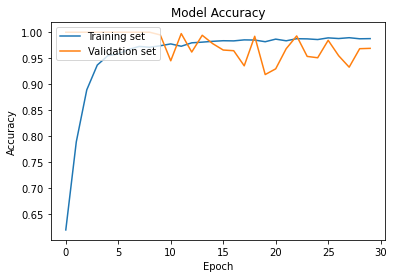

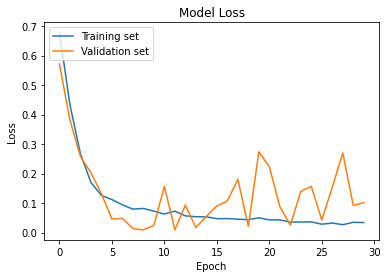

In [36]:
#Plot accuracy based on training and validation set
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

#Plot Loss based on training and validation set
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

## ROC with AUC curve

In [37]:
pred = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(Y_test, pred)
fpr, tpr, thresholds2 = roc_curve(Y_test, pred)

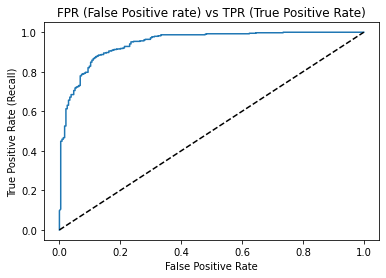

In [38]:
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    

plot_roc(fpr, tpr)

## Confusion Matrix

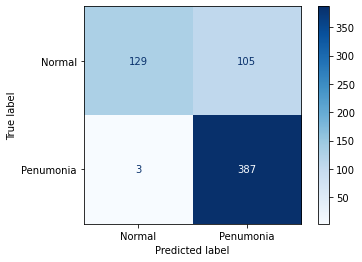

accuracy of chest X-ray for pneumonia:0.83
Precison of chest X-ray for pneumonia:0.79
Recall of chest X-ray for pneumonia:0.99
f1 of chest X-ray for pneumonia:0.88


In [41]:
cm  = confusion_matrix(Y_test, np.round(test_logits))
labels = ["Normal", "Penumonia"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

true_negative, false_positive, false_negative, true_positive  = cm.ravel()
accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)
f1 = 2/(1/recall+1/precision)

print('accuracy of chest X-ray for pneumonia:{:.2f}'.format(accuracy))
print('Precison of chest X-ray for pneumonia:{:.2f}'.format(precision))
print('Recall of chest X-ray for pneumonia:{:.2f}'.format(recall))
print('f1 of chest X-ray for pneumonia:{:.2f}'.format(f1))

## Prediction

In [42]:
##### Prediction #####
test_logits = model.predict(X_test)
predict_class = (test_logits > 0.5).astype("int32")
#predict_class.transpose()

pneumonia_indx = np.where((predict_class==Y_test)&(Y_test==1))[0]
normal_indx = np.where((predict_class==Y_test)&(Y_test==0))[0]

print(len(pneumonia_indx),len(normal_indx) )

387 112


In [43]:
test_logits = model.predict(X_test)
predict_class = (test_logits > 0.5).astype("int32")
#predict_class.transpose()

pneumonia_indx = np.where((predict_class==Y_test)&(Y_test==1))[0]
normal_indx = np.where((predict_class==Y_test)&(Y_test==0))[0]

print(len(pneumonia_indx),len(normal_indx) )

387 112


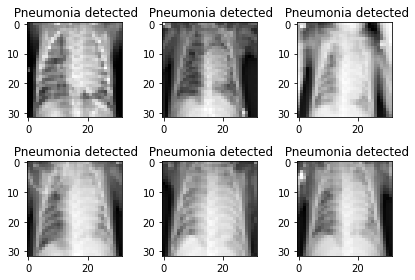

In [44]:
# Detect pneumonia
for i, correct in enumerate(pneumonia_indx[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[correct].reshape(RESIZE_IMG,RESIZE_IMG), cmap='gray', interpolation='none')
    plt.title(" Pneumonia detected")
    plt.tight_layout()

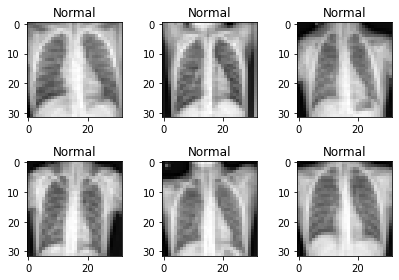

In [45]:
# Detect normal
for i, correct in enumerate(normal_indx[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[correct].reshape(RESIZE_IMG,RESIZE_IMG), cmap='gray', interpolation='none')
    plt.title("Normal")
    plt.tight_layout()

## Final Result

accuracy of chest X-ray for pneumonia:0.83
Precison of chest X-ray for pneumonia:0.79
Recall of chest X-ray for pneumonia:0.99
f1 of chest X-ray for pneumonia:0.88